Предположим, что у нас имеется два независимых класса.

In [1]:
class Geom:
    name = "Geom"
    
    
class Line:
    
    def draw(self):
        print("Рисование линии")

In [2]:
g = Geom
g.name 

'Geom'

Очевидно, что используя экземпляр класса Geom g, мы не можем обратиться к методу draw класса Line

In [3]:
g.draw

AttributeError: type object 'Geom' has no attribute 'draw'

In [4]:
l = Line()

In [6]:
l.draw()

Рисование линии


Два класса Geom и Line представляют собой два разных пространства имен, но при необходимости мы можем установить связь между ними, и открытые атрибуты класса Geom могут быть доступны в классе Line

In [7]:
class Geom:
    name = "Geom"
    
    
class Line(Geom):
    def draw(self):
        print("Рисование линии")

In [8]:
g = Geom()
l = Line()
l.name

'Geom'

Конструкция, когда один класс определяется на основе другого называется **наследованием**.

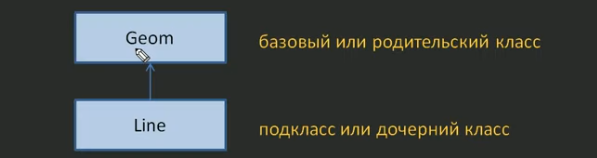

*стрелка направляется от дочернего класса к базовому*

In [9]:
class Geom:
    name = "Geom"
    
    
class Line(Geom):
    def draw(self):
        print("Рисование линии")
        
    def set_coords(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        
        
class Rect(Geom):
    def draw(self):
        print("Рисование прямоугольника")
        
    def set_coords(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2

Мы видим два класса Rect и Line, внутри которых мы можем заметить дублирование кода, а именно метода set_coords, которое в дальнейшем может быстро нарастать. Чтобы этого дублирования не было мы можем общий метод для всех дочерних классов вынесни в базовый.

In [10]:
class Geom:
    name = "Geom"
    
    def set_coords(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
    
    
class Line(Geom):
    def draw(self):
        print("Рисование линии")
        
        
class Rect(Geom):
    def draw(self):
        print("Рисование прямоугольника")

In [12]:
l = Line()
r = Rect()
l.set_coords(1, 1, 2, 2)
r.set_coords(1, 1, 2, 2)

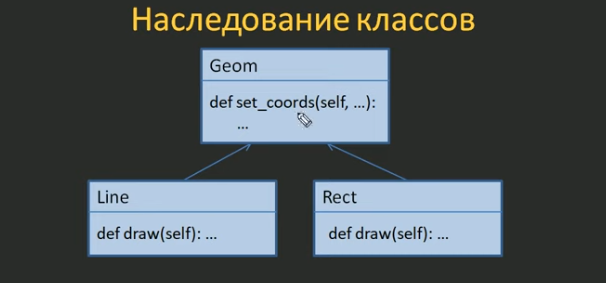

Иерархия насследования выглядит следующим образом.

При вызове метода set_coords, то он сначала ищется в классе Line и если он там не находится, то он ищется в базовых классах, в нашем случае это класс Geom. Важным моментом является то, что параметр self в методе set_coords класса Geom будет ссылаться на объект экземпляра класса Line. Таким образом, параметр self может ссылаться не только на объекты этого же класса, но и на объекты дочерних классов, если метод был вызыван через объект дочернего класса.

In [13]:
print(l.__dict__)

{'x1': 1, 'y1': 1, 'x2': 2, 'y2': 2}


In [14]:
print(r.__dict__)

{'x1': 1, 'y1': 1, 'x2': 2, 'y2': 2}


Переопределение...